# <b>Machine Learning Project- Linear Regression</b>

## Context

◾ The context of the current study is based on a company that sells clothes in its website and app, besides selling consulting with stylists. The client goes through the consultancy and can buy clothes on the website or app.<br>
◾ <b>Question to be answered:</b> Is it better to invest on the website or app to get more revenue?

## Steps

◾ Loading data <br>
◾ Data Analysis <br>
◾ Modelling <br>
◾ Evaluation model <br>
◾ Results presentation <br>

## Data Dictionary

- <b>Email:</b> customer's email address<br>
- <b>Address:</b> customer's home address <br>
- <b>Avatar:</b> Color used on the customer's profile identification<br>
- <b>Avg. Session Length:</b> Average stylist session lenght of each customer (in minutes)<br>
- <b>Time on App:</b> Time spent on app for each customer (in minutes)<br>
- <b>Time on Website:</b> Time spent on company website for each customer (in minutes)<br>
- <b>Length of Membership:</b> Membership time in years for each customer<br>
- <b>Yearly Amount Spent:</b> Amount spent yearly in dollars for each customer<br>

In [156]:
#IMPORTS
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np

#VISUALIZATIONS
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#MACHINE LEARNING
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

#METRICS
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

## Loading Data

The data used here is available on the Kaggle website, in CSV format. No complex extraction were needed in this study. <br><br>
It's important to mention that most of the time of the real corporate world, the variables we have to model the problem solution will not be ready as you see here. Usually we need to generate this variables through data processing and/or extraction from the company's database, using SQL or other methods to reach this point where the data is grouped and summarized by customer.

In [113]:
#LOADING FILE
data = pd.read_csv('Ecommerce customers.csv')

In [114]:
#CHECKING FIRST 3 ROWS OF THE DATASET
data.head(3)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505


In [115]:
#HOW MUCH ROWS AND COLUMNS DOES WE HAVE?
data.shape

(500, 8)

It's a small dataset, with 500 rows.

In [116]:
#BASIC DATA STATISTICS
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In the basic statistics, we can see that the variables has a <b>low Standard Deviation</b>, wich means that probably these variables follows a normal distribution (also known as gaussian distribution), where mostly of the values are close to the average and we don't have a significative quantity of outliers.

In [117]:
#CHECKING DATATYPES
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


<b>**TIP**:</b><br> Sometimes we can do some <b>datatype transformation</b> to make the dataset <b>lighter and consuming less memory</b> (this information is given at "memory usage" above, on the last row). Altough this is a small dataset, here is an example:

In [118]:
#GETTING ALL FLOAT64 TYPE COLUMNS
col_float = list(data.select_dtypes(include='float64').columns)

#TRANSFORMING INTO FLOAT16
data[col_float] = data[col_float].astype('float16')

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float16
 4   Time on App           500 non-null    float16
 5   Time on Website       500 non-null    float16
 6   Length of Membership  500 non-null    float16
 7   Yearly Amount Spent   500 non-null    float16
dtypes: float16(5), object(3)
memory usage: 16.7+ KB


With this simple transformation, we have <b>reduced the memory used of the dataset in almost 50%</b>. We change 'float64' datatypes to 'float16', which means, this field was specting 64 characters each row, but in the data we have seen that the lenght of numbers was less than 15.

## EDA - Exploratoy Data Analysis

<b>Hypotesis to validate:</b><br>
1) Who spend <b>more time on app</b>, spend more money<br>
2) Who spend <b>more time on website</b>, spend more money <br>
3) Who has <b>more time of memership</b>, spend more money <br>
4) Who spend <b>more time on stylists sessions</b>, spend more money

The datatype of the variables we have to manipulate, is all numeric. So, a very effective way to understand wich variable has more impact on the money spent is <b>measuring correlations</b>. Here we have 2 kinds of ways to measure correlation:<br>
- <b>Scatterplots between 2 variables;</b><br>
- <b>Heatmap of correlation grade.</b><br><br>
<b>The difference is:</b><br>
- <b>SCATTERPLOTS</b> we need to find visualy a certain grade of linear correlation. Eg: when a variable value goes up, and the other variable's values also goes up, we have a <b>positive correlation</b>. In this case, variables that has high correlation (negative or positive) allow us to almost trace a growing or descending line in the data.<br>
- <b>HEATMAPS OF CORRELATION:</b> the intersection of two variables that has high correlation, will have a darker color. The legend of the heatmap will answer if the correlation is positive or negative. We can also print the values of the correlations in the heatmap. In this case, the higher the correlation is, closer to 1 is the value.

In [120]:
#PANDAS PROFILE TO GENERATE QUICK ANALYSIS
relatorio = ProfileReport(data, title='Relatório sobre os dados')
relatorio

Pandas profile gives us a lot of information in just one line of code. Here we can see missing values, distributions and also correlation between variables.

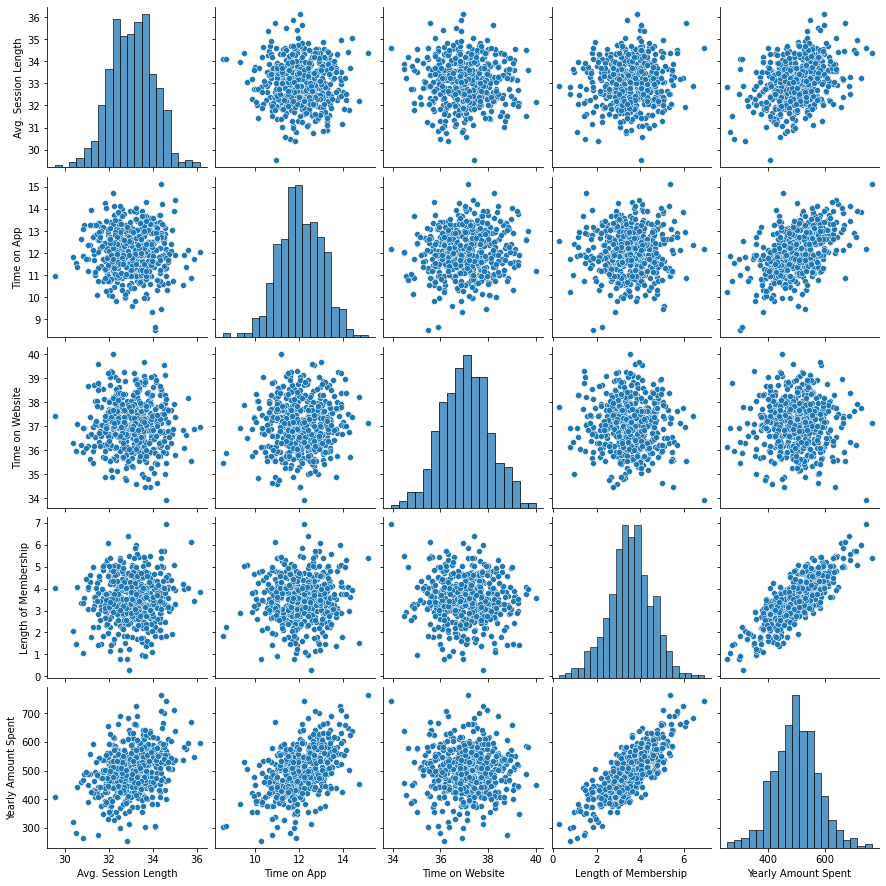

In [121]:
#ALL CORRELATIONS AND DISTRIBUTIONS USING SCATTERPLOTS
sns.pairplot(dados)

<b>HYPOTESIS VALIDATIONS:</b><br>
<b>1) Who spend more time on app, spend more money:</b><br>
TRUE, but it's a medium tendecy<br>
<b>2) Who spend more time on website, spend more money</b><br>
FALSE, there is no tendency<br>
<b>3) Who has more time of membership, spend more money</b><br>
TRUE, there is a high correlation/tendency<br>
<b>4) Who spend more time on stylists sessions, spend more money</b><br>
FALSE, there is low tendency, but nothing significant

The variables that has higher correlation with the "Amount Yearly Spent" are:<br>
◾ <b>Length of Membership</b> (high)<br>
◾ <b>Time on App</b> (low)<br>
<br>
With this information, we can build a Linear Regression model to estimate the Yearly Amount Spent.

### Modelling

In [122]:
#VARIABLES AND TARGET
y = data['Yearly Amount Spent']
x = data[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

#TRAIN TEST SPLIT
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

#CALLING THE MODEL FUNCTION
modelo = LinearRegression()

#TRAINING
modelo_treinado = modelo.fit(x_train, y_train)

#PREDICTING
predito = modelo_treinado.predict(x_test)

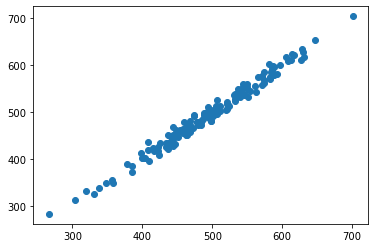

In [123]:
plt.scatter(y_test, predito)

Here we can see that <b>test values and predicted values are very close to each other</b>, because there is no much variation in the data. Precisely for this reason, the probability of the model been overfitted in this case is high. So lets measure the quality of the model in the test data (traditional method) and then, run a cross validation method to check if the value is very different. If it is, the model is overfitted.

### Evaluating the model

In [124]:
#MAE: This number represents the average value of the model's error. 
    #Eg: if its 10, means that the model can predict the value 10 units less or more than the real value
print('MAE: ', mean_absolute_error(y_test, predito))

#RMSE: Same idea of MAE, but give more weight to outliers. If there is an outlier in the dataset, the RMSE will be higher than MAE
print('RMSE: ', np.sqrt(mean_squared_error(y_test, predito)))

#R² gives us the information about how much our model explain the dataset variability.
print('R²: ', r2_score(y_test, predito))

MAE:  7.8505454
RMSE:  9.643405
R²:  0.9832794840811521


We have <b>low values of MAE and RMSE</b>, showing that the model could gerenalize the data very well, but our <b>R² score is very high.</b><br><br>
R² score have a problem with datasets that includes more than 1 variable, because it uses the correlation between the variables to increment its score.<br>
An alternative to R² in case of datasets with more than one variable, is <b>Adjusted R²</b>. Adjusted R² reduces the R² score if a presented variable doesn't contribute significantly to the model. Here is the formula of Adjusted R²:

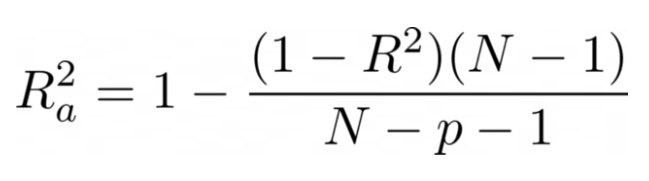

<b>"N"</b> represents the number of samples, <b>"P"</b> represents the number of variables. We can see that as more variables used without  increases significantly the R² value, lower will be the Adjusted R², wich allow us to get a less biased measure and always lower than R².

In [125]:
#ADJUSTED R² FORMUlA
def adjusted_r2(y_test, y_pred, X_train):
    from sklearn.metrics import r2_score
    adj_r2 = (1 - ((1 - r2_score(y_test, y_pred)) * (len(y_test) - 1)) / 
          (len(y_test) - X_train.shape[1] - 1))
    return adj_r2

adjusted_r2(y_test, predito, x_train)

0.9828182284695977

Adjusted R² is still high. It can be a clue that our model is explaining very well the variability of the data in fact. Let's run a Cross Validation and analyze the MAE of multiple parts of the data.

In [126]:
#FUNCTION TO RETURN MAE WITH CROSS VALIDATION
def cross_validation(model, x, y):
    resultados = cross_val_predict(model, x, y, cv=10)
    return print(metrics.mean_absolute_error(y, resultados))

#USING KFOLD TO SPLIT THE DATA INTO DIFFERENT PARTS OF TRAIN AND TEST, REMOVING THE SELECTION BIAS
cv = KFold(n_splits=5, shuffle=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)
lr = LinearRegression()
lr.fit(x_train, y_train)
y_predito = lr.predict(x_test)
resultados = cross_val_predict(lr, x, y, cv=cv)
print('MAE:', metrics.mean_absolute_error(y, resultados))

MAE: 7.962588


Still low, this is good!

With these metrics so far, our model is well adjusted to dataset and explaining its variability. The average MAE is 7.9, when we compare this value with the data scale wich is between 300 and 700, a 8 points error up or down is very low.<br><br>

With this mean absolute error, we are saying that if a person spent 400, our model said that it will spent beteen 392 and 408, wich is a very close prediction.

### Testing with just 2 variables, the most important ones.

In [127]:
#SPLIT INTO VARIABLES AND TARGET
y = data['Yearly Amount Spent']
x = data[['Time on App', 'Length of Membership']]

#TRAIN AND TEST SPLIT
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

#MODEL
modelo = LinearRegression()

#TRAINING
modelo_treinado = modelo.fit(x_train, y_train)

#PREDICTION
predito = modelo_treinado.predict(x_test)

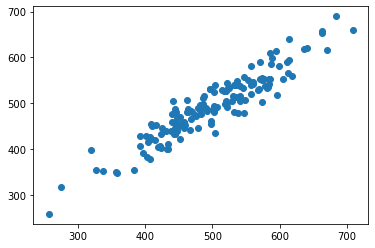

In [128]:
plt.scatter(y_test, predito)

The data space in this case gone more sparse, showing up that the values of our prediction are further comparing to the real values.

In [129]:
print('MAE: ', mean_absolute_error(y_test, predito))
print('MSE: ', mean_squared_error(y_test, predito))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, predito)))
print('R²: ', r2_score(y_test, predito))

MAE:  22.823952
MSE:  810.52045
RMSE:  28.46964
R²:  0.8719263902782485


In [130]:
#CROSS VALIDATION 
cv = KFold(n_splits=5, shuffle=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)
lr = LinearRegression()
lr.fit(x_train, y_train)
y_predito = lr.predict(x_test)
resultados = cross_val_predict(lr, x, y, cv=cv)
print('MAE:', metrics.mean_absolute_error(y, resultados))

MAE: 22.483923


Using just <b>2 variables to train the algorithm, we had a higher error</b> of the prediction comparing to use all variables. So, the <b>best model in this case was the first one.</b>

### Results presentation

The first model was the best one to undesrtand the data variability, a simple linear regression. And i'm showing it below

In [133]:
y = data['Yearly Amount Spent']
x = data[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
modelo = LinearRegression()
modelo_treinado = modelo.fit(x_train, y_train)
predito = modelo_treinado.predict(x_test)

In [134]:
#CHECKING THE VARIABLES THAT HAS MORE IMPACTO TO THE MODEL
coef = pd.DataFrame(modelo.coef_, x.columns, columns=['Coefs'])
coef

,Coefs
Avg. Session Length,26.419998
Time on App,38.518822
Time on Website,0.140357
Length of Membership,61.731709


In [144]:
#TOTAL AMOUNT SPENT ALONG THE YEARS OF MEMBERSHIP
data['total_amount_spent'] = data['Length of Membership'] * data['Yearly Amount Spent']

<AxesSubplot:xlabel='Length of Membership', ylabel='total_amount_spent'>

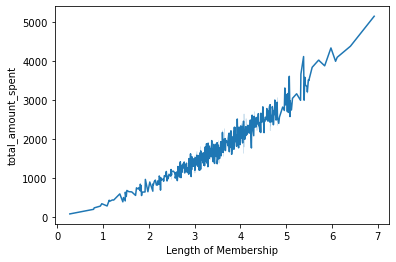

In [145]:
sns.lineplot(x=data['Length of Membership'], y=data['total_amount_spent'])

Its a sponencial a growth

In [219]:
#SELECTING COLUMNS
data2 = data[['Avg. Session Length', 'Time on App',\
              'Time on Website', 'Length of Membership',\
              'Yearly Amount Spent', 'total_amount_spent']]

#ROUNDING VALUES
data2['Length of Membership'] = np.round(data2['Length of Membership'], decimals = 0)
data2.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,total_amount_spent
0,34.500000,12.656250,39.56250,4.0,588.00,2400.0
1,31.921875,11.109375,37.28125,3.0,392.25,1045.0
2,33.000000,11.328125,37.12500,4.0,487.50,2001.0
3,34.312500,13.718750,36.71875,3.0,582.00,1816.0
4,33.343750,12.796875,37.53125,4.0,599.50,2664.0


In [220]:
#AVERAGE YEARLY AMOUNT SPENT BY YEARS OF MEMBERSHIP
group_membership = pd.DataFrame(data2.groupby(by='Length of Membership')['Yearly Amount Spent'].mean()).reset_index()
group_membership['last_value'] = group_membership['Yearly Amount Spent'].shift(1, axis=0)

In [221]:
#FUNCTION THAT RETURNS PERCENTAGE VARIATION OF AMOUNT SPENT FOR EACH YEAR OF MEMBERSHIP
def pct_variation(col1, col2):
    return ((col2 - col1)/col1)*100

In [222]:
#APPLYING THE FUNCTION
col1 = group_membership['last_value']
col2 = group_membership['Yearly Amount Spent']
group_membership['pct_amount_spent_variation'] = pct_variation(col1, col2)
group_membership.drop('last_value', axis=1, inplace=True)
group_membership['pct_amount_spent_variation'] = np.round(group_membership['pct_amount_spent_variation'], decimals=0)

In [225]:
group_membership

,Length of Membership,Yearly Amount Spent,pct_amount_spent_variation
0,0.0,314.5,NaN
1,1.0,340.5,8.0
2,2.0,414.5,22.0
3,3.0,470.5,14.0
4,4.0,524.5,11.0
5,5.0,578.5,10.0
6,6.0,687.5,19.0
7,7.0,744.0,8.0


<AxesSubplot:xlabel='Length of Membership', ylabel='pct_amount_spent_variation'>

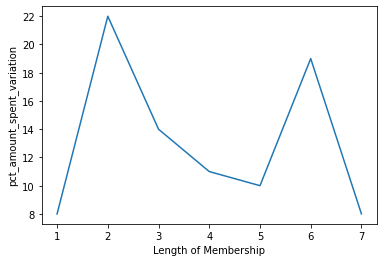

In [227]:
sns.lineplot(x=group_membership['Length of Membership'], y=group_membership['pct_amount_spent_variation'])

Here we can see that turning 1 or less year of membership to <b>2 years of membership, can increases the average of the yearly amount spent in 20~22%</b>.

### Answering the question: should the company invest more in app or website to get more revenue?

Comparing website and app, those who spend more time on app, actually spend more money. But, <b>a variable that has much mor influency on the yearly revenue is the lenght of membership.</b> <br>

Then, my indication for increase yearly revenue is to <b>invest in a loyalty program</b>. Customers that have more time of membership spent much more money in products and this could affect the revenue in a more effective way in long-term.

### Observation about the usage of Linear Regression on this study
To this problem, the Linear Regression was not the solution itself. The solution was the correlation analysis through the data. But if we had a time series with de data along the time, we could also predict the Yearly Amount Spent, getting even more value to the project.